In [1]:
from tm_utils import *

2023-09-05 21:00:48.925455: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-05 21:00:50.101108: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-09-05 21:00:51.335606: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-05 21:00:51.337667: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

Loading BokehJS ...

In [2]:
name = "Knight's Encyclopedia of Conspiracy Theories in American History"
st0 = name

with open('KnightCORRECTED.pickle', 'rb') as handle:
    docs_d = pickle.load(handle)
docs_d={k:v+"." if v[-1]!="." else v for k,v in docs_d.items()}
print(len(docs_d))

data_size=len(docs_d)

data = list(docs_d.values()) 
data_words = list(sent_to_words(data))
print(len(data_words))

dw=sorted(set([item for sublist in data_words for item in sublist]))
print(len(dw))
# print(dw)

# Threshold: higher threshold fewer phrases
threshold=1000 #100
print("threshold = %i (higher threshold fewer phrases)" %threshold)

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=3, threshold=threshold) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=threshold)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# print(data_words_bigrams[q],'\n')
print("Bigrams")
# for w in data_words_bigrams:
# #     if "_" in w:
#     print(w)
b1=[item for sublist in data_words_bigrams for item in sublist]
bb1=sorted(set([x for x in b1 if "_" in x]))
print("No. of bigrams = %i" %len(bb1))
# print(bb1)

data_words_trigrams = make_trigrams(data_words_nostops)
# print(data_words_trigrams[q],'\n')
print("Trigrams")
# for w in data_words_trigrams:
# #     if "_" in w:
#     print(w)
trg1=[item for sublist in data_words_trigrams for item in sublist]
strg1=sorted(set([x for x in trg1 if x.count("_")==2]))
print("No. of trigrams = %i" %len(strg1))
# print(strg1)
    
##############################################################################

# # Do lemmatization keeping only noun, adj, vb, adv
# data_lemmatized = lemmatization(data_words_bigrams) #, allowed_postags=['NOUN']) #, 'ADJ', 'VERB', 'ADV']

# # Words to be removed from lemmatization
# rem=[]

# mdl=[]
# for i in data_lemmatized:
#     j=[]
#     for ii in i:
#         if ii not in rem: # and ii in all_terms:
#             j.append(ii)
#     mdl.append(j)
    
# data_lemmatized=mdl

# with open('data_lemmatized.pkl', 'wb') as f:
#     pickle.dump(data_lemmatized, f)

with open('data_lemmatized.pkl', 'rb') as f:
    data_lemmatized = pickle.load(f)

##############################################################################

dl=sorted(set([item for sublist in data_lemmatized for item in sublist]))
print(len(dl))

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
print("lenDictionary",len(id2word))

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# print([len(x) for x in corpus])
cw=sorted(set([item for sublist in corpus for item in sublist]))
print(len(cw))

# 302
# 302
# 23237
# threshold = 1000 (higher threshold fewer phrases)
# Bigrams
# No. of bigrams = 304
# Trigrams
# No. of trigrams = 4
# 7473
# lenDictionary 7473
# 12423


302
302
23237
threshold = 1000 (higher threshold fewer phrases)
Bigrams
No. of bigrams = 304
Trigrams
No. of trigrams = 4
7473
lenDictionary 7473
12423


In [3]:
data_lemmatized

[['overview',
  'believer',
  'slave',
  'power',
  'conspiracy',
  'party',
  'conspiracy',
  'theory',
  'abolitionist',
  'conspiracy',
  'vantage',
  'point',
  'opponent',
  'slavery',
  'term',
  'conspiracy',
  'theory',
  'villain',
  'conspirator',
  'midnight',
  'meeting',
  'material',
  'abolitionism',
  'communism',
  'part',
  'campaign',
  'overturn',
  'order',
  'caricature',
  'disfigurement',
  'stalk',
  'reality',
  'mockery',
  'dream',
  'revolution',
  'slave',
  'rebellion',
  'abolitionist',
  'slave',
  'time',
  'intermeddling',
  'southerner',
  'abolitionist',
  'slave',
  'day',
  'insubordination',
  'discipline',
  'insubordination',
  'proslavery',
  'publicist',
  'abolition',
  'action',
  'slave',
  'class',
  'world',
  'southerner',
  'abolitionist',
  'network',
  'agitator',
  'agent',
  'salesman',
  'minister',
  'teacher',
  'slave',
  'slaughter',
  'master',
  'neighborhood',
  'state',
  'abolition',
  'agent',
  'statement',
  'course',


In [4]:
print(bb1)

['aaron_burr', 'abbie_hoffman', 'abortion_providers', 'abraham_lincoln', 'accusing_girls', 'adam_weishaupt', 'adolph_hitler', 'adults_aged', 'agent_orange', 'al_capone', 'alan_berg', 'alcohol_tobacco', 'alex_constantine', 'alexander_haig', 'alexander_hamilton', 'alfred_murrah', 'alger_hiss', 'anglo_saxon', 'anthony_summers', 'anthracite_region', 'anyone_else', 'arthur_schlesinger', 'awful_disclosures', 'balfour_declaration', 'ballistics_tests', 'bani_sadr', 'barry_goldwater', 'bartolomeo_vanzetti', 'bavarian_illuminati', 'bear_arms', 'behavioral_modification', 'bethesda_doctors', 'bettmann_corbis', 'biblical_prophecy', 'bin_laden', 'bo_gritz', 'bob_woodward', 'branch_davidian', 'branch_davidians', 'caesar_column', 'camp_douglas', 'carnegie_endowment', 'carousel_club', 'casper_weinberger', 'casual_contact', 'cattle_mutilations', 'chip_berlet', 'clay_shaw', 'closed_doors', 'coercive_acts', 'commander_inchief', 'concentration_camps', 'cosa_nostra', 'cotton_mather', 'cover_ups', 'crack_coc

In [5]:
print(strg1)

['king_martin_luther', 'mk_ultra_program', 'peter_dale_scott', 'polka_dot_dress']


### LDA (Latent Dirichlet Allocation)

In [6]:
dictionary=id2word 
corpus=corpus 
texts=data_lemmatized

In [7]:
def compute_coherence_values2(dictionary, corpus, texts,coherence,
limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model
    with respective number of topics
    """
    coherence_values = []
    model_list = []
    topic_coherence_values=[]
    for num_topics in range(start, limit+1, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts,
        dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())
        topic_coherence_values.append(coherencemodel.get_coherence_per_topic())

    return model_list, coherence_values, topic_coherence_values


In [8]:
# start=5 
# limit=29  
# step=1
# model_list_cuci, coherence_values_cuci, topic_coherence_values_cuci = compute_coherence_values2(dictionary=dictionary, corpus=corpus, texts=texts,coherence="c_uci", start=start, limit=limit, step=step)
# model_list_cnpmi, coherence_values_cnpmi, topic_coherence_values_cnpmi = compute_coherence_values2(dictionary=dictionary, corpus=corpus, texts=texts,coherence="c_npmi", start=start, limit=limit, step=step)

In [9]:
# min_topics=5
# max_topics=30
# stride = 1
# mod_list_lda_umass, coh_list_lda_umass = compute_coherence_values(LdaModel, dictionary, texts, max_topics=max_topics, 
#                                                                      corpus=corpus, topics=False, transformed_vectorizer=False, tfidf_norm=False,
#                                                                      min_topics=min_topics, stride=stride, n_top_words=False, measure='u_mass')

# mod_list_lda_cv, coh_list_lda_cv = compute_coherence_values(LdaModel, dictionary, texts, max_topics=max_topics, 
#                                                                      corpus=corpus, topics=False, transformed_vectorizer=False, tfidf_norm=False,
#                                                                      min_topics=min_topics, stride=stride, n_top_words=False, measure='c_v')


In [10]:
# from matplotlib.gridspec import GridSpec
# # from tm_utils import show_best_num_topics
# # def show_best_num_topics(model_type, umass_coherence_vals,cv_coherence_vals, max_topics, min_topics=2, stride=3)

# #     min_topics=min_topics
# #     max_topics=max_topics
# #     stride=stride

# x = range(min_topics, max_topics, stride)
# print(len(x),x)

# max_y1 = max(coh_list_lda_umass)
# max_x1 = x[coh_list_lda_umass.index(max_y1)]
# print(max_x1,max_y1)

# max_y2 = max(coh_list_lda_cv)
# max_x2 = x[coh_list_lda_cv.index(max_y2)]
# print(max_x2,max_y2)

# max_y3 = max(coherence_values_cuci)
# max_x3 = x[coherence_values_cuci.index(max_y3)]
# print(max_x3,max_y3)

# max_y4 = max(coherence_values_cnpmi)
# max_x4 = x[coherence_values_cnpmi.index(max_y4)]
# print(max_x4,max_y4)

# fig = plt.figure(constrained_layout=True, figsize=(14,6)) #12
# spec = GridSpec(ncols=2, nrows=2, figure=fig) #2
# ax1 = fig.add_subplot(spec[0, 0])
# ax2 = fig.add_subplot(spec[0, 1])
# ax3 = fig.add_subplot(spec[1, 0])
# ax4 = fig.add_subplot(spec[1, 1])

# ax1.plot(x, coh_list_lda_umass, label='Coherence Values')
# ax1.set_xlabel('Num Topics')
# ax1.set_ylabel('Coherence score (U_MASS)')
# ax1.legend(loc='best')
# ax1.text(max_x1, max_y1, str((max_x1, max_y1)))

# ax2.plot(x, coh_list_lda_cv, label='Coherence Values')
# ax2.set_xlabel('Num Topics')
# ax2.set_ylabel('Coherence score (C_V)')
# ax2.legend(loc='best')
# ax2.text(max_x2, max_y2, str((max_x2, max_y2)))


# ax3.plot(x, coherence_values_cuci, label='Coherence Values')
# ax3.set_xlabel('Num Topics')
# ax3.set_ylabel('Coherence score (C_UCI)')
# ax3.legend(loc='best')
# ax3.text(max_x3, max_y3, str((max_x3, max_y3)))

# ax4.plot(x, coherence_values_cnpmi, label='Coherence Values')
# ax4.set_xlabel('Num Topics')
# ax4.set_ylabel('Coherence score (C_NPMI)')
# ax4.legend(loc='best')
# ax4.text(max_x4, max_y4, str((max_x4, max_y4)))

In [11]:
# # from matplotlib.gridspec import GridSpec
# # from tm_utils import show_best_num_topics
# best_num_lda_topics = show_best_num_topics('LDA', coh_list_lda_umass, coh_list_lda_cv, max_topics=max_topics, min_topics=min_topics, stride=1)
# print('The most coherent number of LDA topics to use is: {}'.format(best_num_lda_topics))

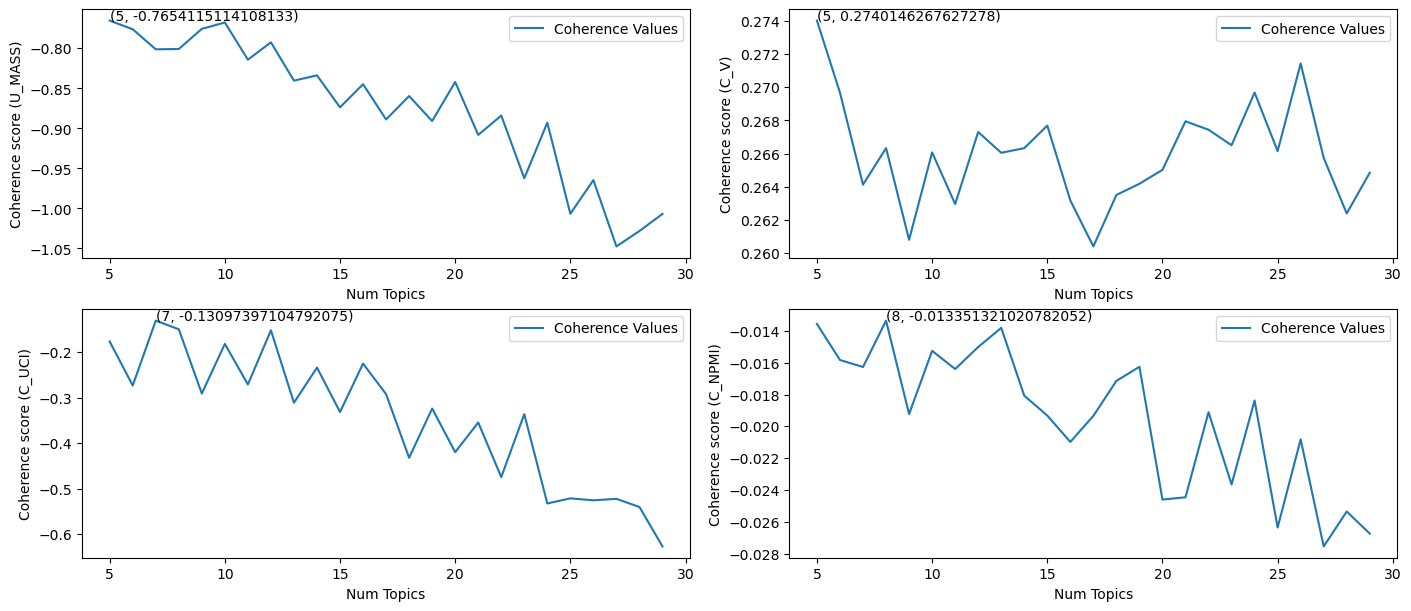

In [12]:
from IPython.display import Image
Image(filename='coherence_5_30.png')

In [13]:
# with open('umass_5_30.pkl', 'wb') as f:
#     pickle.dump(coh_list_lda_umass, f)
# with open('cv_5_30.pkl', 'wb') as f:
#     pickle.dump(coh_list_lda_cv, f)
# with open('cuci1_5_30.pkl', 'wb') as f:
#     pickle.dump(coherence_values_cuci, f)
# with open('cnpmi1_5_30.pkl', 'wb') as f:
#     pickle.dump(coherence_values_cnpmi, f)

In [14]:
best_num_lda_topics=8
ldatopics =str(best_num_lda_topics)

In [15]:
# lda_mod = models.LdaModel(corpus, num_topics=best_num_lda_topics,  
#                                 id2word=dictionary, 
#                                 update_every=0, #batch training
#                                 chunksize=1000, 
#                                 passes=500,
#                                 random_state=121)

In [16]:
# lda_mod.save('lda'+ldatopics + '.model')

In [17]:
lda_mod =  models.LdaModel.load('lda'+ ldatopics + '.model')

In [18]:
with open('data_lemmatized.pkl', 'rb') as f:
    data_lemmatized = pickle.load(f)

id2word =models.LdaModel.load('lda'+ ldatopics + '.model.id2word')
corpus = [id2word.doc2bow(text) for text in data_lemmatized]
print("len_corpus",len(corpus))

dl=sorted(set([item for sublist in data_lemmatized for item in sublist]))
print(len(dl)==len(set(dl)))
print("No. of words in data_lemmatized",len(dl))

num_words=len(lda_mod.id2word)
print("num_words",num_words)

len_corpus 302
True
No. of words in data_lemmatized 7473
num_words 7473


In [19]:
#5 Topics
# Topic 0: intelligence king conspiracy theory war agency aircraft government evidence operation
# Topic 1: conspiracy government group movement world organization theory member militia order
# Topic 2: conspiracy theory film assassination evidence time year book story government
# Topic 3: conspiracy government slave state war man year power law people
# Topic 4: conspiracy bank theory government money gold drug industry time percent

# 7 Topics
# Topic 0: government theory aircraft war evidence missile air intelligence explosion plane
# Topic 1: government group conspiracy militia movement world member organization theory bombing
# Topic 2: conspiracy theory film assassination mind control critic story year death
# Topic 3: conspiracy government slave state war man year power law people
# Topic 4: bank conspiracy money theory gold government industry percent oil theorist
# Topic 5: conspiracy government evidence investigation police assassination theory time death king
# Topic 6: conspiracy theory church world group movement order year time book

# 8 Topics  
# Topic 0: aircraft theory war evidence explosion missile fluoridation attack air plane
# Topic 1: government group conspiracy militia movement world theory member organization right
# Topic 2: conspiracy theory film assassination mind book critic control story year
# Topic 3: conspiracy government slave state war year man power law party
# Topic 4: bank conspiracy theory money gold government industry percent oil state
# Topic 5: government conspiracy evidence investigation police theory assassination time death drug
# Topic 6: conspiracy church theory world century order movement chamber group time
# Topic 7: computer hacker internet pound witch trial people year conspiracy witchcraft

In [20]:
# best_num_lda_topics=11
topics_names_d={
"Topic # 01":"Topic 1", 
"Topic # 02":"Topic 2", 
"Topic # 03":"Topic 3", 
"Topic # 04":"Topic 4", 
"Topic # 05":"Topic 5",
"Topic # 06":"Topic 6",
"Topic # 07":"Topic 7", #Risk Governance",
"Topic # 08":"Topic 8"#Water Governance",
# "Topic # 09":"Topic 9: Control", #Foresight Transitions" #,
# "Topic # 10":"Topic 10: Family", #Firm Performance"
# "Topic # 11":"Topic 11: Pleasure" #Application Capacity", 
# "Topic # 12":"Topic 12: T12", #Policy Scenarios", 
# "Topic # 13":"Topic 13: T13", #Adaptation Policy", 
# "Topic # 14":"Topic 14: T14", #Innovation Governance", 
# "Topic # 15":"Topic 15: T15", #Science Planning", 
# "Topic # 16":"Topic 16: T16", #Technology Governance",
# "Topic # 17":"Topic 17: T17" #Technology Governance",
}

rrr=[x.replace(":","") for x in list(topics_names_d.values())]
topics_names_l=[" ".join(x.split(" ")[2:]) for x in topics_names_d.values()] #["T1", "T2", "T3", "T4" "T5","T6","T7","T8","T9"]

# cmaps=["forestgreen","maroon","gold","indigo","darkseagreen","hotpink","darkorange","dodgerblue","lime","red",] #"violet"
cmaps=["forestgreen","maroon","gold","indigo","hotpink","darkseagreen","darkorange","red","dodgerblue","lime","lightcoral","moccasin","acquamarine","lightsteelblue","peru","greenyellow","teal"]

# rem=["sound","melody","composition","tune","beat","song","harp","rhythm","drum","musician",
#      "night","inspiration","way","work","source","kingdom", "mountain","bird","beauty","power",
#      "instrument","joy","human",
#      "music","animal","nature"] #

In [21]:
get_document_topics = [lda_mod.get_document_topics(item) for item in corpus]
print(len(get_document_topics),len(data_lemmatized))
# for e in get_document_topics:
#     print(len(e),e)
    
pubs_to_topics_with_prob_d={}
for i,e in enumerate(get_document_topics):
    t=[]
    for ee in e:
        to=rrr[ee[0]]
        t.append((to,ee[1]))
    pubs_to_topics_with_prob_d[list(docs_d.keys())[i]]=t
print(len(pubs_to_topics_with_prob_d))
for k,v in pubs_to_topics_with_prob_d.items():
    print(k,v)

302 302
302
Abolitionism [('Topic 4', 0.9988921)]
Abortion [('Topic 2', 0.49803448), ('Topic 4', 0.040257532), ('Topic 7', 0.45750412)]
African Americans [('Topic 3', 0.14339797), ('Topic 4', 0.6690715), ('Topic 6', 0.18669109)]
Agent Orange [('Topic 5', 0.094659746), ('Topic 6', 0.90015763)]
AIDS [('Topic 3', 0.5204392), ('Topic 5', 0.4786216)]
Alien and Sedition Acts [('Topic 4', 0.9989994)]
American Indian Movement [('Topic 2', 0.23435959), ('Topic 6', 0.76256186)]
American Protective Association [('Topic 4', 0.99251086)]
American Revolution [('Topic 2', 0.1303631), ('Topic 4', 0.5771553), ('Topic 6', 0.047554158), ('Topic 7', 0.2433064)]
Anarchists [('Topic 2', 0.11926936), ('Topic 3', 0.042048074), ('Topic 4', 0.44326174), ('Topic 8', 0.3927569)]
Anti-Catholicism [('Topic 4', 0.7496714), ('Topic 7', 0.24843597)]
Anticommunism [('Topic 2', 0.25538504), ('Topic 3', 0.07699529), ('Topic 4', 0.4596932), ('Topic 6', 0.0965916), ('Topic 7', 0.110655226)]
Anti-Federalists [('Topic 2', 0.

In [22]:
# with open('pubs_to_'+ ldatopics + 'topics_with_prob_d.pkl', 'wb') as handle:
#     pickle.dump(pubs_to_topics_with_prob_d, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [23]:
#Perplexity measure (lower is better)
print('The Perplexity measure of the final LDA model is: {}'.format(lda_mod.log_perplexity(corpus)))

The Perplexity measure of the final LDA model is: -7.556625230419857


In [24]:
from pprint import pprint

# Show Topics
pprint(lda_mod.show_topics(formatted=False))

# Compute Coherence Score
coherence_model = CoherenceModel(model=lda_mod, texts=data_lemmatized, dictionary=id2word, coherence='c_v') #_ldamallet
coherence_lda_mod = coherence_model.get_coherence() #_lda_mod
print('\nCoherence Score: ', coherence_lda_mod)

[(0,
  [('aircraft', 0.013022107),
   ('theory', 0.012668364),
   ('war', 0.011230662),
   ('evidence', 0.0099692065),
   ('explosion', 0.00873084),
   ('missile', 0.008468044),
   ('fluoridation', 0.008467791),
   ('attack', 0.007553536),
   ('air', 0.007451561),
   ('plane', 0.007422591)]),
 (1,
  [('government', 0.019925795),
   ('group', 0.017054833),
   ('conspiracy', 0.016671123),
   ('militia', 0.016669737),
   ('movement', 0.01467779),
   ('world', 0.01181079),
   ('theory', 0.010026906),
   ('member', 0.009855437),
   ('organization', 0.009817351),
   ('right', 0.009354867)]),
 (2,
  [('conspiracy', 0.03642407),
   ('theory', 0.018959489),
   ('film', 0.014289355),
   ('assassination', 0.008174121),
   ('mind', 0.007167176),
   ('book', 0.006963826),
   ('critic', 0.006802543),
   ('control', 0.0066120354),
   ('story', 0.006601345),
   ('year', 0.0057272986)]),
 (3,
  [('conspiracy', 0.015931046),
   ('government', 0.013612241),
   ('slave', 0.01268141),
   ('state', 0.011178

In [25]:
tt=[" ".join([z[7:].replace('"','') for z in y[1].split(" + ")]) for y in lda_mod.print_topics(best_num_lda_topics)]
for i,t in enumerate(tt):
    st="Topic %i: %s" %(i,t)
    print(st)

Topic 0: aircraft theory war evidence explosion missile fluoridation attack air plane
Topic 1: government group conspiracy militia movement world theory member organization right
Topic 2: conspiracy theory film assassination mind book critic control story year
Topic 3: conspiracy government slave state war year man power law party
Topic 4: bank conspiracy theory money gold government industry percent oil state
Topic 5: government conspiracy evidence investigation police theory assassination time death drug
Topic 6: conspiracy church theory world century order movement chamber group time
Topic 7: computer hacker internet pound witch trial people year conspiracy witchcraft


In [26]:
lda_df = get_topics(lda_mod,best_num_lda_topics,num_words) # ,
print(len(lda_df))
lda_df.rename(columns=topics_names_d, inplace=True)
lda_df

7473


Topic 1                  Topic 2  \
0        aircraft 0.013022107   government 0.019925795   
1          theory 0.012668364        group 0.017054833   
2             war 0.011230662   conspiracy 0.016671123   
3       evidence 0.0099692065      militia 0.016669737   
4        explosion 0.00873084      movement 0.01467779   
...                       ...                      ...   
7468     firing 2.3988541e-05       hoffa 1.236151e-05   
7469       fart 2.3988541e-05     trading 1.236151e-05   
7470  detailing 2.3988541e-05  meadowland 1.236151e-05   
7471     enlist 2.3988541e-05         ale 1.236151e-05   
7472   doubling 2.3988541e-05    doubling 1.236151e-05   

                        Topic 3                  Topic 4  \
0         conspiracy 0.03642407   conspiracy 0.015931046   
1            theory 0.018959489   government 0.013612241   
2              film 0.014289355         slave 0.01268141   
3     assassination 0.008174121        state 0.011178505   
4              mind 0.007167176          war 0.010956853   
...                         ...                      ...   
7468   eisenschiml 7.751746e-06   stalwart 5.3460376e-06   
7469        enmity 7.751746e-06   airstrip 5.3460376e-06   
7470        esteem 7.751746e-06   bathroom 5.3460376e-06   
7471          dion 7.751746e-06  devastate 5.3460376e-06   
7472     globalism 7.751746e-06   doubling 5.3460376e-06   

                          Topic 5                     Topic 6  \
0                bank 0.027803006      government 0.015961032   
1          conspiracy 0.021079255      conspiracy 0.015942896   
2               theory 0.01695895         evidence 0.01086574   
3               money 0.015525558     investigation 0.0108043   
4               gold 0.0150771765         police 0.0095057255   
...                           ...                         ...   
7468        reynold 1.6009864e-05      lusitania 8.133412e-06   
7469  excessiveness 1.6009864e-05       marching 8.133412e-06   
7470          engel 1.6009864e-05     readership 8.133412e-06   
7471          rhode 1.6009864e-05  antisubmarine 8.133412e-06   
7472       doubling 1.6009864e-05      globalism 8.133412e-06   

                       Topic 7                  Topic 8  
0       conspiracy 0.027019965     computer 0.012765734  
1           church 0.014357897       hacker 0.010956579  
2           theory 0.014106088     internet 0.008265127  
3            world 0.009062899        pound 0.008161983  
4         century 0.0081354445       witch 0.0067541143  
...                        ...                      ...  
7468        bang 1.3146769e-05  depiction 3.1758555e-05  
7469     breadth 1.3146769e-05   corridor 3.1758555e-05  
7470      broker 1.3146769e-05  continent 3.1758555e-05  
7471     peasant 1.3146769e-05    rupture 3.1758555e-05  
7472  aftershave 1.3146769e-05   doubling 3.1758555e-05  

[7473 rows x 8 columns]

In [27]:
#lda_df.to_excel('TopicModelingKeywords_8.xlsx', index = False)

In [28]:
remc=["navy","white","snow","whitesmoke","seashell","honeydrew","ivory","lightyellow","beige",'lavender',
      "floralwhite","mintcream","azure","alicblue","lavenderblush","ghostwhite","lightblue","lightgreen","chartreuse"]
cols=[c for c in list({name for name in mcd.CSS4_COLORS
         if "xkcd:" + name in mcd.XKCD_COLORS}) if c not in remc] #45 colors

cols=["green","blue","orange","darkkhaki","red","yellow"]

# cloud = WordCloud(stopwords=stop_words,
#                   background_color='white',
#                   width=2500,
#                   height=1800,
#                   max_words=50,
#                   colormap='tab10',
#                   color_func=lambda *args, **kwargs: cols[i],
#                   prefer_horizontal=1.0)

# topics = lda_mod.show_topics(num_words=50,num_topics=best_num_lda_topics,formatted=False)

# # cols=xkcd_cl
# # cols=["green","blue","orange","darkkhaki","red"]
# # cols=['maroon','forestgreen','violet','gold','dodgerblue','red','darkseagreen','hotpink','darkorange','indigo','lime','sienna','teal','orchid']
# cols=cmaps

# if best_num_lda_topics % 2 == 0:
#     dimx=int(best_num_lda_topics/2)
#     dimx=3
#     dimy=3
# else:
#     dimx=int(best_num_lda_topics/2)
#     dimx=3
#     dimy=3

# length_x_axis = 30
# length_y_axis = 10
# rows  = 3
# columns = 3
# fig_height = 2.
# height = length_y_axis * rows
# width = length_x_axis  * columns
# plot_aspect_ratio= float(width)/float(height)
# # figsize=(fig_height  * plot_aspect_ratio, fig_height )
# figsize=(40,32) #(2*fig_height  * plot_aspect_ratio, 6.5*fig_height) #1.4 10/5 (10/3) 7
# fig, axes = plt.subplots(dimy,dimx, figsize=figsize, sharex=True, sharey=True) # (14,17)
# tti=['Topic ' + str(i) for i in range(best_num_lda_topics)]
                        
# intr=topics_names_l
# tti=['Topic ' + str(i+1) for i in range(best_num_lda_topics)]

# for i, ax in enumerate(axes.flatten()):
#     if i<len(topics):
#         fig.add_subplot(ax)
#         topic_words = dict(topics[i][1])
#         cloud.generate_from_frequencies(topic_words, max_font_size=300)
#         ax.imshow(cloud)
#         ss='Topic ' + str(i+1) #+ " ("+intr[i]+")"
# #         ss=ss[i] #'Topic ' + str(i)
#         ax.set_title(ss, fontdict=dict(size=45, fontweight='bold', y=1.3)) #1.04
#         ax.axis('off')

# fig.delaxes(axes[2][2])
# # fig.delaxes(axes[3][1])
# # fig.delaxes(axes[1][2])

# supt="Topic Modeling of %s" %name
# fig.suptitle(supt,fontsize=50, fontweight='bold', y=1.03) #0.98) #30 1.04

# plt.subplots_adjust(wspace=0.2, hspace=0.7)
# plt.axis('off')
# plt.margins(x=0, y=0)
# plt.tight_layout()
# plt.show()

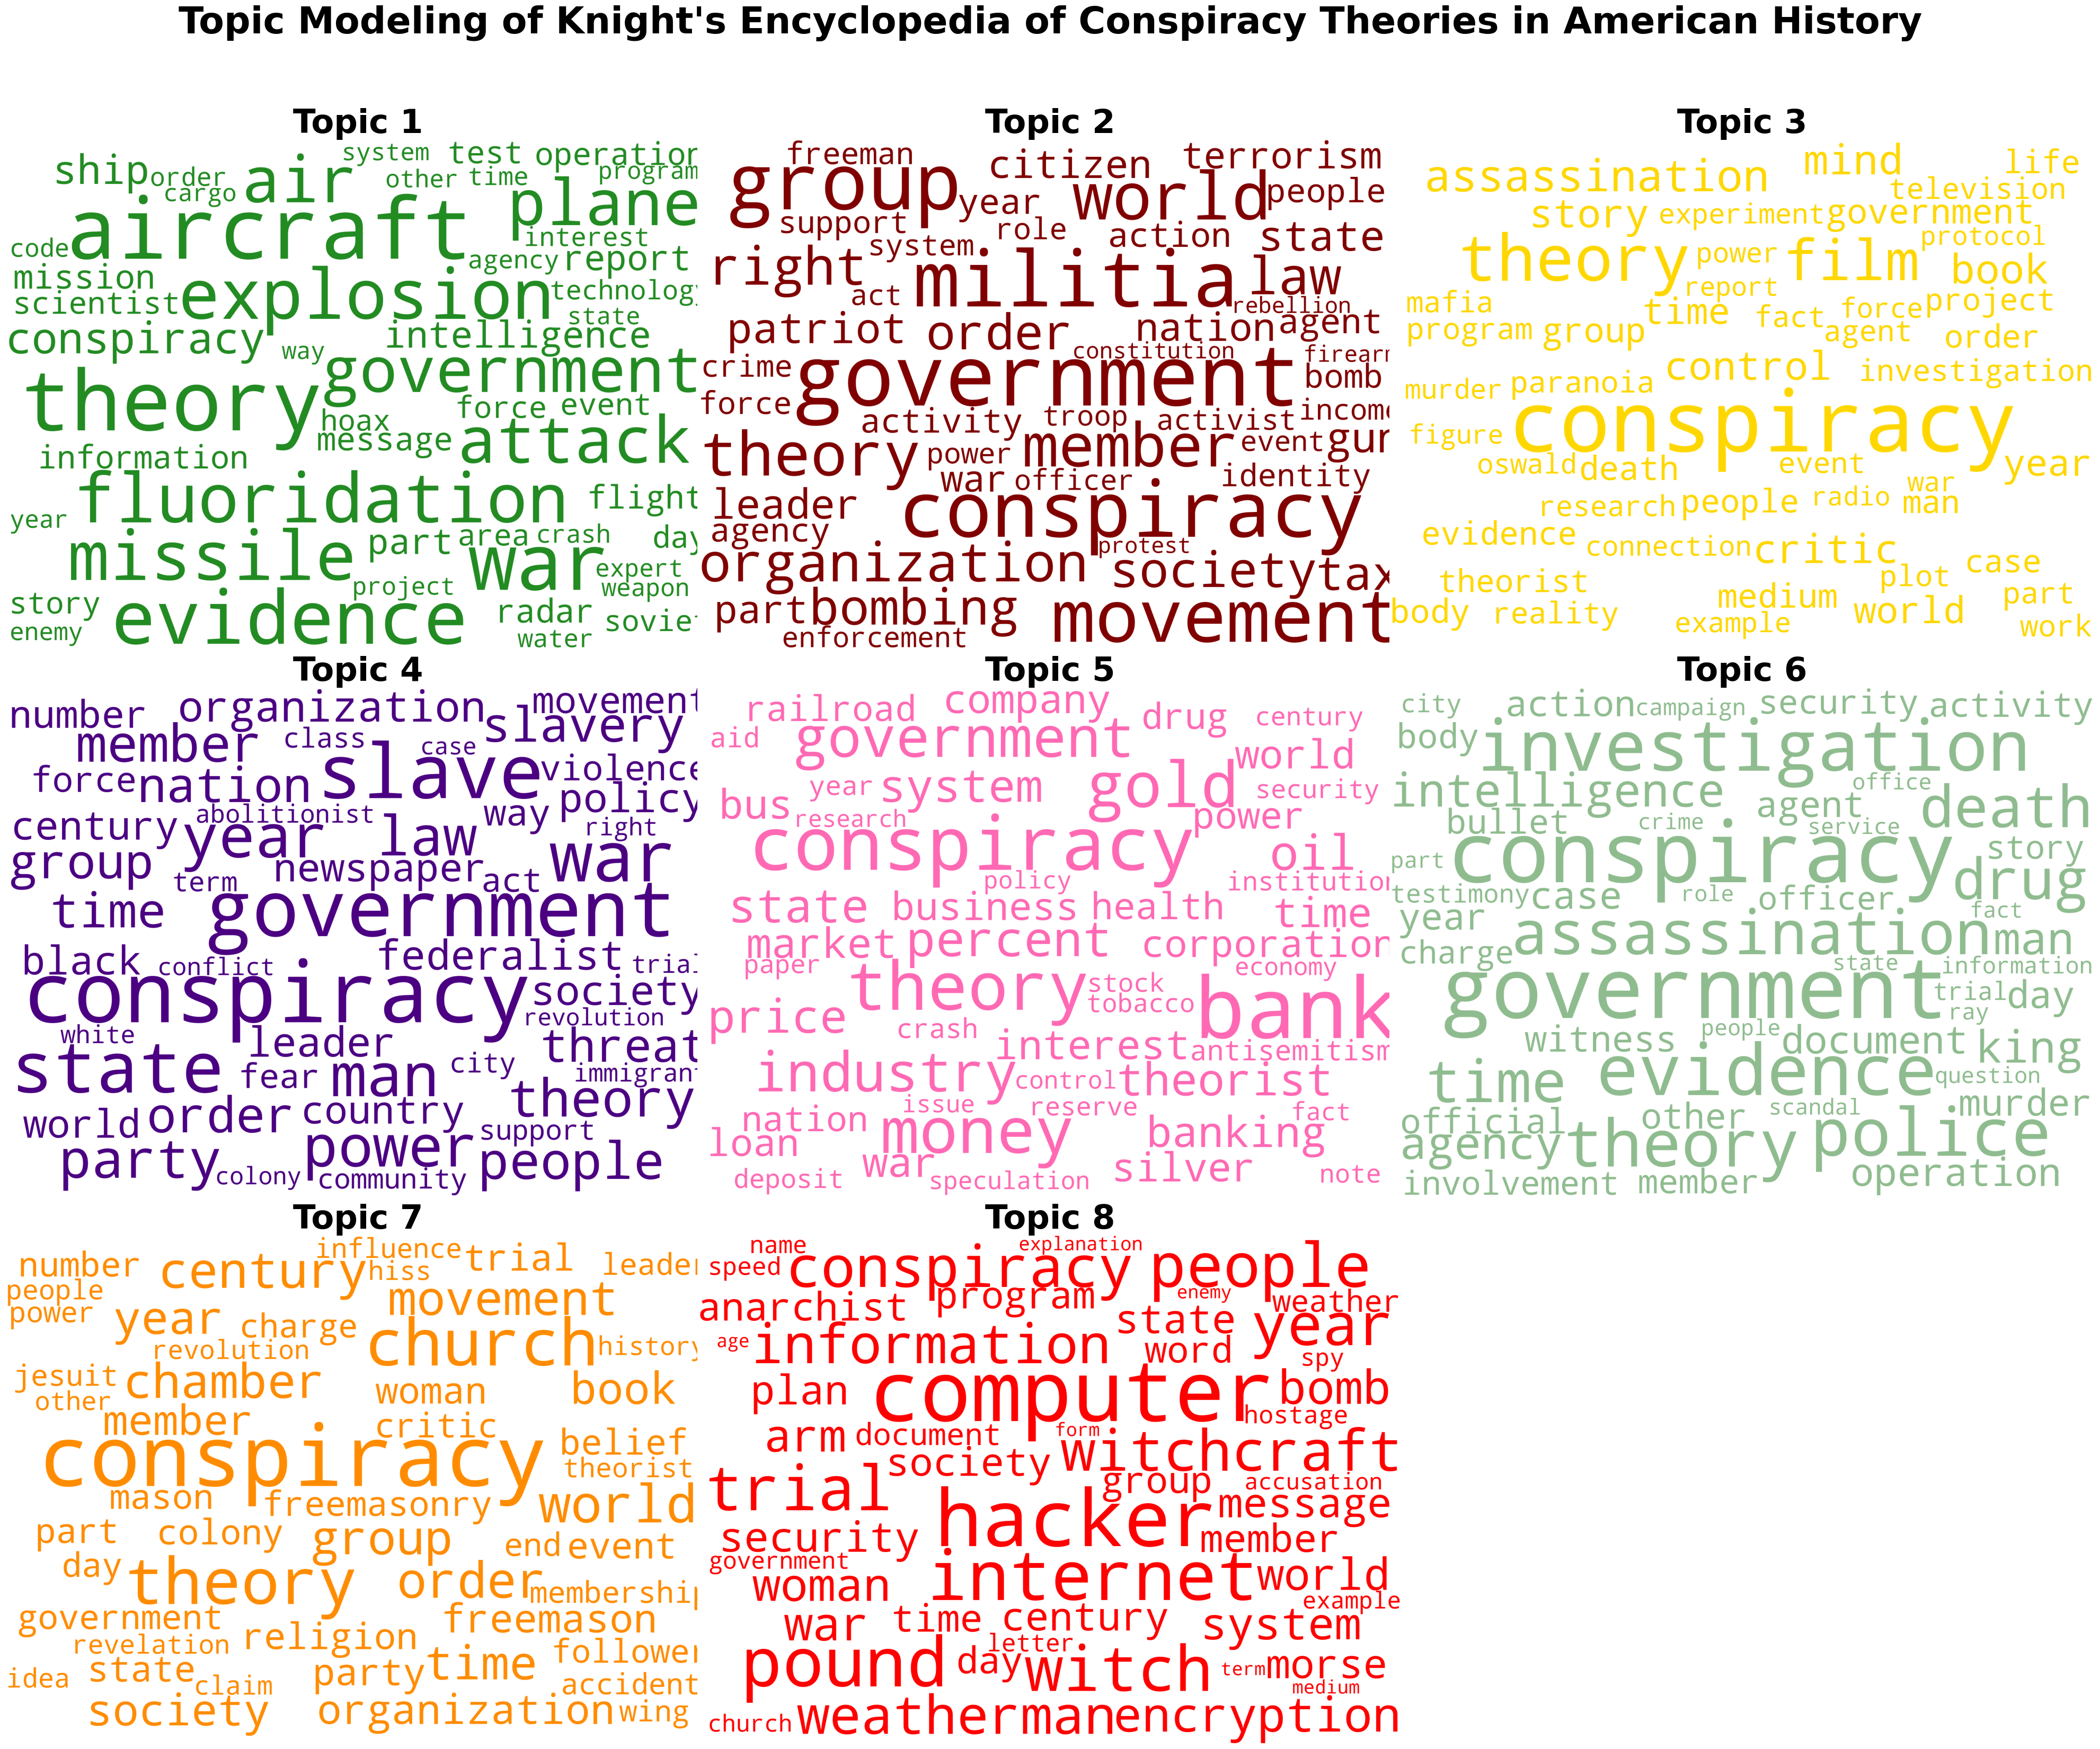

In [29]:
from IPython.display import Image
Image(filename='wordcloud_8.png') 

In [30]:
lda_hellinger_topic_distances = get_most_similar_topics(lda_mod, lda_df, num_topics=best_num_lda_topics)
pretty_print(lda_hellinger_topic_distances)

Hellinger Distances between topics are: 

______________________________________________________________________


(0.7056701052171386, 'Topic 1', 'Topic 5')
 (0.6989672190972113, 'Topic 5', 'Topic 8')
 (0.6854204202517539, 'Topic 1', 'Topic 8')
 (0.6787302156014717, 'Topic 1', 'Topic 7')
 (0.6786645288226862, 'Topic 6', 'Topic 8')
 (0.6775183663643586, 'Topic 1', 'Topic 2')
 (0.6764441517872261, 'Topic 5', 'Topic 6')
 (0.6727962974368483, 'Topic 2', 'Topic 5')
 (0.6727654964422671, 'Topic 5', 'Topic 7')
 (0.6688672696994056, 'Topic 1', 'Topic 4')
 (0.6659212591732914, 'Topic 2', 'Topic 8')
 (0.6607179585308914, 'Topic 3', 'Topic 5')
 (0.6513266082990036, 'Topic 3', 'Topic 8')
 (0.644460225224591, 'Topic 4', 'Topic 5')
 (0.6408949603288643, 'Topic 6', 'Topic 7')
 (0.6398171082163379, 'Topic 1', 'Topic 3')
 (0.636843756120487, 'Topic 2', 'Topic 3')
 (0.6325600572351017, 'Topic 4', 'Topic 8')
 (0.6322610256834079, 'Topic 2', 'Topic 6')
 (0.6302633346362116, 'Topic 7', 'Topic 8')
 (0.6285

In [31]:
texts = data_lemmatized

all_text_joined = [' '.join(w) for w in texts]
klist=list(docs_d.keys())

lda_mod_dom_topics_df, lda_mod_dom_topics_final = get_dominant_topics(klist,lda_mod, corpus, all_text_joined)

print(len(data_lemmatized),len(klist))

302 302


In [32]:
topcs=list(lda_df.columns)
T=[]
W=[]
P=[]
for t in topcs:
    tl=[]
    u=lda_df[t].tolist()
    for s in u:
        sl=s.split(" ")
        w=sl[0]
        p=sl[1]
        T.append(t.replace(":",""))
        W.append(w)
        P.append(p)
print(len(T),len(W),len(P))
lda_ext_df=pd.DataFrame({
    "Topic":T,
    "Keyword":W,
    "Probability":P
})
print(len(lda_ext_df))
lda_ext_df.to_pickle('lda_ext_df_8.pkl')
lda_ext_df

59784 59784 59784
59784


Topic    Keyword    Probability
0      Topic 1   aircraft    0.013022107
1      Topic 1     theory    0.012668364
2      Topic 1        war    0.011230662
3      Topic 1   evidence   0.0099692065
4      Topic 1  explosion     0.00873084
...        ...        ...            ...
59779  Topic 8  depiction  3.1758555e-05
59780  Topic 8   corridor  3.1758555e-05
59781  Topic 8  continent  3.1758555e-05
59782  Topic 8    rupture  3.1758555e-05
59783  Topic 8   doubling  3.1758555e-05

[59784 rows x 3 columns]

In [33]:
lda_ext_df=pd.read_pickle('lda_ext_df_8.pkl')
print(len(lda_ext_df))
lda_ext_df

59784


Topic    Keyword    Probability
0      Topic 1   aircraft    0.013022107
1      Topic 1     theory    0.012668364
2      Topic 1        war    0.011230662
3      Topic 1   evidence   0.0099692065
4      Topic 1  explosion     0.00873084
...        ...        ...            ...
59779  Topic 8  depiction  3.1758555e-05
59780  Topic 8   corridor  3.1758555e-05
59781  Topic 8  continent  3.1758555e-05
59782  Topic 8    rupture  3.1758555e-05
59783  Topic 8   doubling  3.1758555e-05

[59784 rows x 3 columns]

In [34]:
rrr_d={}
for i,j in enumerate(rrr):
#     print(j)
    t=[]
    for z in j.split():
        if z.isdigit():
            t.append(int(z))
    rrr_d[i]=j
rrr_d

{0: 'Topic 1',
 1: 'Topic 2',
 2: 'Topic 3',
 3: 'Topic 4',
 4: 'Topic 5',
 5: 'Topic 6',
 6: 'Topic 7',
 7: 'Topic 8'}

In [35]:
print(len(lda_mod_dom_topics_df))
dfx=lda_mod_dom_topics_df
print(dfx.columns)
# dfx

dfx["Dominant Topic"]=dfx["Dominant_Topic"].apply(lambda row: rrr_d[row])
# dfx["Publication"]=dft["Publication"]
dfx.rename(columns={"Publication":"Encyclopedia Item","Probability_Contribution":"Probability Contribution"},inplace=True)
dfx=dfx[["Encyclopedia Item","Dominant_Topic","Probability Contribution"]] #,'Topic Modeling Keywords']]
print(len(dfx))
dfx

302
Index([          'Dominant_Topic', 'Probability_Contribution',
                 'Topic_Keywords',              'Publication',
                                0],
      dtype='object')
302


Encyclopedia Item Dominant_Topic Probability Contribution
0           Abolitionism              3                   0.9989
1               Abortion              1                    0.498
2      African Americans              3                   0.6691
3           Agent Orange              5                   0.9002
4                   AIDS              2                   0.5204
..                   ...            ...                      ...
297    Yellow Journalism              2                   0.8779
298              Yippies              5                   0.8809
299   Zenger, John Peter              3                   0.7286
300  Zimmermann Telegram              5                   0.3185
301                  ZOG              1                   0.7835

[302 rows x 3 columns]

In [36]:
dfx.to_pickle("DominantTopics_df_8.pkl")  
dfx.to_excel('EncyclopediaItems&DominantTopics_8.xlsx', index = False)

In [37]:
dfx = pd.read_pickle("DominantTopics_df_8.pkl") 
print(len(dfx))
dfx

302


Encyclopedia Item Dominant_Topic Probability Contribution
0           Abolitionism              3                   0.9989
1               Abortion              1                    0.498
2      African Americans              3                   0.6691
3           Agent Orange              5                   0.9002
4                   AIDS              2                   0.5204
..                   ...            ...                      ...
297    Yellow Journalism              2                   0.8779
298              Yippies              5                   0.8809
299   Zenger, John Peter              3                   0.7286
300  Zimmermann Telegram              5                   0.3185
301                  ZOG              1                   0.7835

[302 rows x 3 columns]

In [38]:
dt_d=dfx.set_index('Encyclopedia Item').to_dict()['Dominant_Topic']

In [39]:
print(len(lda_mod_dom_topics_final))
lda_mod_dom_topics_final

302


Dominant_Topic Probability_Contribution  \
Document_Number                                           
0                            3                   0.9989   
1                            1                    0.498   
2                            3                   0.6691   
3                            5                   0.9002   
4                            2                   0.5204   
...                        ...                      ...   
297                          2                   0.8779   
298                          5                   0.8809   
299                          3                   0.7286   
300                          5                   0.3185   
301                          1                   0.7835   

                                                    Topic_Keywords  \
Document_Number                                                      
0                conspiracy, government, slave, state, war, yea...   
1                government, group, conspiracy, militia, moveme...   
2                conspiracy, government, slave, state, war, yea...   
3                government, conspiracy, evidence, investigatio...   
4                conspiracy, theory, film, assassination, mind,...   
...                                                            ...   
297              conspiracy, theory, film, assassination, mind,...   
298              government, conspiracy, evidence, investigatio...   
299              conspiracy, government, slave, state, war, yea...   
300              government, conspiracy, evidence, investigatio...   
301              government, group, conspiracy, militia, moveme...   

                       Original_Text  \
Document_Number                        
0                       Abolitionism   
1                           Abortion   
2                  African Americans   
3                       Agent Orange   
4                               AIDS   
...                              ...   
297                Yellow Journalism   
298                          Yippies   
299               Zenger, John Peter   
300              Zimmermann Telegram   
301                              ZOG   

                                                       Publication  
Document_Number                                                     
0                overview believer slave power conspiracy party...  
1                campaign abortion member antiabortion advocate...  
2                conspiracy legend rumor role beginning decade ...  
3                herbicide part assistance campaign agent white...  
4                year conspir theory emergence deficiency syndr...  
...                                                            ...  
297              style sensationalist newspaper century yellow_...  
298              paul_krassner movement youth myth medium guerr...  
299              printer brawl letter minority opinion case sta...  
300              winter war situation telegram world war zimmer...  
301              zog zionist government term survivalist racist...  

[302 rows x 5 columns]

In [40]:
#lda_mod_dom_topics_final.style.applymap(color_green).applymap(make_bold)
lda_mod_dom_topics_final_first30 = lda_mod_dom_topics_final.head(30)
lda_mod_dom_topics_final_first30.style.applymap(color_green).applymap(make_bold)

In [41]:
lda_most_representative_docs = get_most_representative_docs(lda_mod_dom_topics_final, n_topics=20)
lda_most_representative_docs.style.applymap(color_green).applymap(make_bold)

In [42]:
lda_topic_dist = get_topic_distribution(lda_mod_dom_topics_final, lda_most_representative_docs, n_topics=20)
lda_topic_dist.style.applymap(color_green).applymap(make_bold)

In [43]:
# import pyLDAvis
# # import pyLDAvis.gensim
# import pyLDAvis.gensim_models as gensimvis
# pyLDAvis.enable_notebook()

# # prepared = pyLDAvis.gensim.prepare(lda_mod, corpus, dictionary)
# prepared = gensimvis.prepare(lda_mod, corpus, dictionary)
# pyLDAvis.save_html(prepared, 'pyldavis.html')
# display(pyLDAvis.display(prepared))

In [44]:
from IPython.display import IFrame
IFrame(src='pyldavis.html', width=1300, height=600)

### LDA Visualization: T-distributed Stochastic Neighbor Embedding with PCA initialization

In [45]:
# http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf

In [46]:
n_topics=best_num_lda_topics
lda_base_model = lda.LDA(n_topics=n_topics, n_iter=1000, random_state=111)
vectorizer = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word', max_features=5000)
x_counts = vectorizer.fit_transform(all_text_joined)
doc_x_tops = lda_base_model.fit_transform(x_counts)

In [47]:
# angle close to 1 prioritizes speed over accuracy
tsne_model = TSNE(n_components=2, verbose=1, random_state=222, angle=.1, init='pca') #1

# 10D -> 2D
tsne_lda = tsne_model.fit_transform(doc_x_tops)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 302 samples in 0.001s...
[t-SNE] Computed neighbors for 302 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 302 / 302
[t-SNE] Mean sigma: 0.174863
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.138561
[t-SNE] KL divergence after 1000 iterations: 0.441834


In [48]:
#Cf. JSON Serialization issue: 
#    https://github.com/bokeh/bokeh/issues/5439
#    https://github.com/bokeh/bokeh/issues/6222
#   https://github.com/bokeh/bokeh/issues/7523

#number of displayed keywords
n_top_words = 50 #best_num_lda_topics #10

title="t-SNE plot of the %i Topics of %s" %(n_topics,name)

xf0=plot_tsne(title, list(docs_d.keys()), lda_base_model, vectorizer, doc_x_tops, tsne_lda, colormap, n_top_words=n_top_words) #10 30
# all_text_joined
# plot_tsne(title, doc_list, fitted_lda, fitted_count_vectorizer, transformed_lda, transformed_tsne, color_map, n_top_words=10):

output_file("tsne_plot_8.html")

/home/lenny/miniconda3/envs/consrep/lib/python3.10/site-packages/bokeh/io/notebook.py:404: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



In [49]:
IFrame(src='tsne_plot_8.html', width=800, height=600)

In [50]:
pubs_to_topics_with_prob_d1={}
for i,e in enumerate(get_document_topics):
    t=[]
    for ee in e:
#         to=rrr[ee[0]]
        t.append((ee[0],ee[1]))
    pubs_to_topics_with_prob_d1[list(docs_d.keys())[i]]=t
print(len(pubs_to_topics_with_prob_d1))
for k,v in pubs_to_topics_with_prob_d1.items():
    print(k,v)

302
Abolitionism [(3, 0.9988921)]
Abortion [(1, 0.49803448), (3, 0.040257532), (6, 0.45750412)]
African Americans [(2, 0.14339797), (3, 0.6690715), (5, 0.18669109)]
Agent Orange [(4, 0.094659746), (5, 0.90015763)]
AIDS [(2, 0.5204392), (4, 0.4786216)]
Alien and Sedition Acts [(3, 0.9989994)]
American Indian Movement [(1, 0.23435959), (5, 0.76256186)]
American Protective Association [(3, 0.99251086)]
American Revolution [(1, 0.1303631), (3, 0.5771553), (5, 0.047554158), (6, 0.2433064)]
Anarchists [(1, 0.11926936), (2, 0.042048074), (3, 0.44326174), (7, 0.3927569)]
Anti-Catholicism [(3, 0.7496714), (6, 0.24843597)]
Anticommunism [(1, 0.25538504), (2, 0.07699529), (3, 0.4596932), (5, 0.0965916), (6, 0.110655226)]
Anti-Federalists [(1, 0.102426894), (3, 0.8952025)]
Anti-Masonic Party [(6, 0.9951027)]
Anti-Rent War [(1, 0.23880266), (2, 0.42907715), (3, 0.28031737), (4, 0.049493607)]
Antisemitism [(4, 0.5892905), (6, 0.40954632)]
Apocalypticism [(1, 0.14121741), (2, 0.063343205), (4, 0.0113

In [51]:
pt_d={}
for k,v in pubs_to_topics_with_prob_d1.items():
    for vv in v:
        pt_d[(k,vv[0])]=vv[1]
for k,v in pt_d.items():
    print(k,v)

('Abolitionism', 3) 0.9988921
('Abortion', 1) 0.49803448
('Abortion', 3) 0.040257532
('Abortion', 6) 0.45750412
('African Americans', 2) 0.14339797
('African Americans', 3) 0.6690715
('African Americans', 5) 0.18669109
('Agent Orange', 4) 0.094659746
('Agent Orange', 5) 0.90015763
('AIDS', 2) 0.5204392
('AIDS', 4) 0.4786216
('Alien and Sedition Acts', 3) 0.9989994
('American Indian Movement', 1) 0.23435959
('American Indian Movement', 5) 0.76256186
('American Protective Association', 3) 0.99251086
('American Revolution', 1) 0.1303631
('American Revolution', 3) 0.5771553
('American Revolution', 5) 0.047554158
('American Revolution', 6) 0.2433064
('Anarchists', 1) 0.11926936
('Anarchists', 2) 0.042048074
('Anarchists', 3) 0.44326174
('Anarchists', 7) 0.3927569
('Anti-Catholicism', 3) 0.7496714
('Anti-Catholicism', 6) 0.24843597
('Anticommunism', 1) 0.25538504
('Anticommunism', 2) 0.07699529
('Anticommunism', 3) 0.4596932
('Anticommunism', 5) 0.0965916
('Anticommunism', 6) 0.110655226
('A

### Careful with the NUMBER OF TOPICS in next cell!!!!

In [52]:
xf=df_tsne(title, list(docs_d.keys()), lda_base_model, vectorizer, doc_x_tops, tsne_lda, colormap, n_top_words=n_top_words)
xf["topic"]=xf["content"].map(dt_d)

d={}
for pub in list(docs_d.keys()):   
    t=[0 for _ in range(best_num_lda_topics)]
    for k,v in pt_d.items():
        if k[0]==pub:
            t[k[1]]=v
    d[pub]=t

for i in range(best_num_lda_topics):
    dd={}
    for pub in list(docs_d.keys()):
        for k,v in d.items():
            if k==pub:
                dd[pub]=v[i]
    xf["T"+str(i)+" Probability"]=xf["content"].map(dd)

xf.rename(columns={"content":"Encyclopedia Item","topic":"Dominant Topic","topic_key":"t-SNE Cluster"},inplace=True)
xf=xf[["Encyclopedia Item","T0 Probability","T1 Probability","T2 Probability","T3 Probability","T4 Probability","T5 Probability","T6 Probability","T7 Probability","t-SNE Cluster","x","y","colors"]]
# "T6 Probability","T7 Probability","T8 Probability","T9 Probability","T10 Probability",
# "T9 Probability","T10 Probability","T11 Probability", "T5 Probability","T6 Probability","T7 Probability","T8 Probability","T9 Probability",
# xf.to_excel('Publications_TopicProbs_DomTopics&tsneClusters_6.xlsx', index = False)
print(len(xf),len(pt_d),len(docs_d.keys()))
xf

302 717 302


Encyclopedia Item  T0 Probability  T1 Probability  T2 Probability  \
0           Abolitionism        0.000000        0.000000        0.000000   
1               Abortion        0.000000        0.498034        0.000000   
2      African Americans        0.000000        0.000000        0.143398   
3           Agent Orange        0.000000        0.000000        0.000000   
4                   AIDS        0.000000        0.000000        0.520439   
..                   ...             ...             ...             ...   
297    Yellow Journalism        0.116511        0.000000        0.877880   
298              Yippies        0.000000        0.114578        0.000000   
299   Zenger, John Peter        0.000000        0.000000        0.000000   
300  Zimmermann Telegram        0.207201        0.294184        0.000000   
301                  ZOG        0.000000        0.783458        0.000000   

     T3 Probability  T4 Probability  T5 Probability  T6 Probability  \
0          0.998892        0.000000        0.000000        0.000000   
1          0.040258        0.000000        0.000000        0.457504   
2          0.669071        0.000000        0.186691        0.000000   
3          0.000000        0.094660        0.900158        0.000000   
4          0.000000        0.478622        0.000000        0.000000   
..              ...             ...             ...             ...   
297        0.000000        0.000000        0.000000        0.000000   
298        0.000000        0.000000        0.880868        0.000000   
299        0.728584        0.000000        0.000000        0.264993   
300        0.176785        0.000000        0.318533        0.000000   
301        0.207379        0.000000        0.000000        0.000000   

     T7 Probability  t-SNE Cluster          x          y   colors  
0               0.0              1 -13.777087   6.861352  #aec7e8  
1               0.0              7  -4.973184  16.515427  #ff9896  
2               0.0              1 -14.715279   4.607347  #aec7e8  
3               0.0              4   0.239278 -14.262332  #2ca02c  
4               0.0              4  -0.368334 -11.252301  #2ca02c  
..              ...            ...        ...        ...      ...  
297             0.0              3  12.096777  -2.870049  #ffbb78  
298             0.0              7  -1.509284   9.866587  #ff9896  
299             0.0              7  -5.421222  15.051742  #ff9896  
300             0.0              2  13.019525  -2.888551  #ff7f0e  
301             0.0              7  -6.291590  12.201639  #ff9896  

[302 rows x 13 columns]

In [53]:
hp=[z for z in list(xf) if "Probability" in z]
thp=['Topic 1 Probability',
 'Topic 2 Probability',
 'Topic 3 Probability',
 'Topic 4 Probability',
 'Topic 5 Probability',
 'Topic 6 Probability',
 'Topic 7 Probability',
 'Topic 8 Probability']
#  'Topic 9 Probability',
#  'Topic 10 Probability',
#  'Topic 11 Probability']
h_d={}
for i in range(len(hp)):
    h_d[hp[i]]=thp[i]
h_d

{'T0 Probability': 'Topic 1 Probability',
 'T1 Probability': 'Topic 2 Probability',
 'T2 Probability': 'Topic 3 Probability',
 'T3 Probability': 'Topic 4 Probability',
 'T4 Probability': 'Topic 5 Probability',
 'T5 Probability': 'Topic 6 Probability',
 'T6 Probability': 'Topic 7 Probability',
 'T7 Probability': 'Topic 8 Probability'}

In [54]:
for i in range(len(hp)):
    xf=xf.rename(columns=h_d)
xf.drop(columns=['x', 'y', 'colors'], axis=1, inplace=True)
tdt_d={k:"Topic "+str(v+1) for k,v in dt_d.items()}
xf.insert(9, "Dominant Topic", xf["Encyclopedia Item"].map(tdt_d), True)
xf.to_excel('Knight_TopicProbs_DomTopics&tsneClusters_8.xlsx', index = False)
xf

Encyclopedia Item  Topic 1 Probability  Topic 2 Probability  \
0           Abolitionism             0.000000             0.000000   
1               Abortion             0.000000             0.498034   
2      African Americans             0.000000             0.000000   
3           Agent Orange             0.000000             0.000000   
4                   AIDS             0.000000             0.000000   
..                   ...                  ...                  ...   
297    Yellow Journalism             0.116511             0.000000   
298              Yippies             0.000000             0.114578   
299   Zenger, John Peter             0.000000             0.000000   
300  Zimmermann Telegram             0.207201             0.294184   
301                  ZOG             0.000000             0.783458   

     Topic 3 Probability  Topic 4 Probability  Topic 5 Probability  \
0               0.000000             0.998892             0.000000   
1               0.000000             0.040258             0.000000   
2               0.143398             0.669071             0.000000   
3               0.000000             0.000000             0.094660   
4               0.520439             0.000000             0.478622   
..                   ...                  ...                  ...   
297             0.877880             0.000000             0.000000   
298             0.000000             0.000000             0.000000   
299             0.000000             0.728584             0.000000   
300             0.000000             0.176785             0.000000   
301             0.000000             0.207379             0.000000   

     Topic 6 Probability  Topic 7 Probability  Topic 8 Probability  \
0               0.000000             0.000000                  0.0   
1               0.000000             0.457504                  0.0   
2               0.186691             0.000000                  0.0   
3               0.900158             0.000000                  0.0   
4               0.000000             0.000000                  0.0   
..                   ...                  ...                  ...   
297             0.000000             0.000000                  0.0   
298             0.880868             0.000000                  0.0   
299             0.000000             0.264993                  0.0   
300             0.318533             0.000000                  0.0   
301             0.000000             0.000000                  0.0   

    Dominant Topic  t-SNE Cluster  
0          Topic 4              1  
1          Topic 2              7  
2          Topic 4              1  
3          Topic 6              4  
4          Topic 3              4  
..             ...            ...  
297        Topic 3              3  
298        Topic 6              7  
299        Topic 4              7  
300        Topic 6              2  
301        Topic 2              7  

[302 rows x 11 columns]